<table class="m01-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/filipinascimento/dataviz/blob/master/docs/w03-fundamentals/assignment_w3_perception.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a href="https://github.com/filipinascimento/dataviz/blob/main/docs/w03-fundamentals/assignment_w3_perception.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View on Github</a>
  </td>
</table>


# Week 3 Assignment: Perception

In this assignment, we will perform a small experiment to test the Stevens' power law.

You should follow the instructions of this notebook and answer the questions with your code and results.
After that, you should convert this notebook to HTML or PDF and submit it via Canvas. For full instructions on how to submit assignments, please check the previous assignment.

Check out `why_visualization.ipynb` for bonus points.

Let's start by importing the necessary libraries.

In [1]:
import matplotlib.pyplot as plt
import random
import math
import numpy as np
%matplotlib inline

Let's do an experiment! The procedure is as follows:

1. Generate a random number between \[1, 10\];
1. Use a horizontal bar to represent the number, i.e., the length of the bar is equal to the number;
1. Guess the length of the bar by comparing it to two other bars with length 1 and 10 respectively;
1. Store your guess (perceived length) and actual length to two separate lists;
1. Repeat the above steps many times;
1. Check whether Steven's power-law holds.

First, let's define the length of a short and a long bar. We also create two empty lists to store perceived and actual length.

In [2]:
l_short_bar = 1
l_long_bar = 10

perceived_length_list = []
actual_length_list = []

### Perception of length

Let's run the experiment.

The [**`random`**](https://docs.python.org/3.6/library/random.html) module in Python provides various random number generators, and the [**`random.uniform(a,b)`**](https://docs.python.org/3.6/library/random.html#random.uniform) function returns a floating point number in \[a,b\].

We can plot horizontal bars using the [**`pyplot.barh()`**](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.barh) function. Using this function, we can produce a bar graph that looks like this:

In [ ]:
mystery_length = random.uniform(1, 10)  # generate a number between 1 and 10. this is the *actual* length.

plt.barh(np.arange(3), [l_short_bar, mystery_length, l_long_bar], align='center')
plt.yticks(np.arange(3), ('1', '6', '10'))
plt.xticks([]) # no hint!

Btw, `np.arange` is used to create a simple integer list `[0, 1, 2]`.

In [4]:
np.arange(3)

array([0, 1, 2])

Now let's define a function to perform the experiment once. When you run this function, it picks a random number between 1.0 and 10.0 and show the bar chart. Then it asks you to input your estimate of the length of the middle bar. It then saves that number to the `perceived_length_list` and the actual answer to the `actual_length_list`.

Note, if the input box does not appear for you try (1) switching to firefox, OR (2) removing the input line from the code and manually record the numbers in a cell, OR (3) adding a prompt to it like input("enter estimation")

In [9]:
def run_exp_once():
    mystery_length = random.uniform(1, 10)  # generate a number between 1 and 10.

    plt.barh(np.arange(3), [l_short_bar, mystery_length, l_long_bar], height=0.5, align='center')
    plt.yticks(np.arange(3), ('1', '6', '10'))
    plt.xticks([]) # no hint!
    plt.show()

    perceived_length_list.append( float(input()) )
    actual_length_list.append(mystery_length)

Now run the experiment:

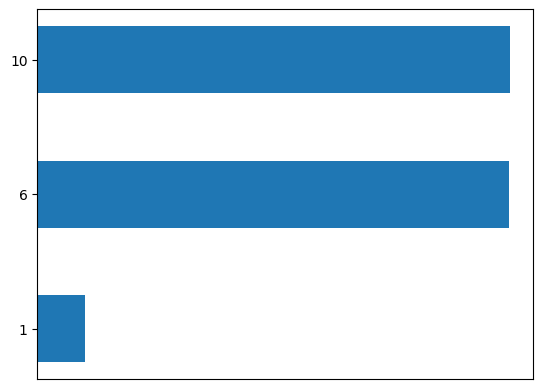

In [ ]:
run_exp_once()

Run the experiment many times to gather your data. Check the two lists to make sure that you have the proper dataset. The length of the two lists should be the same.

> **Note**: You can run the experiment as many times as you want. Just rerun the cell or use a for.

In [ ]:
# YOUR SOLUTION HERE

### Plotting the result

Now we can draw the scatter plot of perceived and actual length. The `matplotlib`'s [**`scatter()`**](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter) function will do this. This is the backend of the pandas' scatterplot. Here is an example of how to use `scatter`:

In [ ]:
plt.scatter(x=[1,5,10], y=[1,10, 5])

**Q3: Now plot your result using the `scatter()` function. You should also use `plt.title()`, `plt.xlabel()`, and `plt.ylabel()` to label your axes and the plot itself.**

In [ ]:
# YOUR SOLUTION HERE

After plotting, let's fit the relation between actual and perceived lengths using a polynomial function. We can easily do it using [**`curve_fit(f, x, y)`**](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) in Scipy, which is to fit $x$ and $y$ using the function `f`. In our case, $f = a*x^b +c$. For instance, we can check whether this works by creating a fake dataset that follows the exact form:

In [ ]:
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.power(x, b) + c

x = np.arange(20)  # [0,1,2,3, ..., 19]
y = np.power(x, 2) # [0,1,4,9, ... ]

popt, pcov = curve_fit(func, x, y)
print('{:.2f} x^{:.2f} + {:.2f}'.format(*popt))

**Q4: Now fit your data!** Do you see roughly linear relationship between the actual and the perceived lengths? It's ok if you don't!

In [ ]:
# YOUR SOLUTION HERE

### Perception of area

Similar to the above experiment, we now represent a random number as a circle, and the area of the circle is equal to the number.

First, calculate the radius of a circle from its area and then plot using the **`Circle()`** function. `plt.Circle((0,0), r)` will plot a circle centered at (0,0) with radius `r`.

In [ ]:
n1 = 0.005
n2 = 0.05

radius1 = np.sqrt(n1/np.pi) # area = pi * r * r
radius2 = np.sqrt(n2/np.pi)
random_radius = np.sqrt(n1*random.uniform(1,10)/np.pi)

plt.axis('equal')
plt.axis('off')
circ1 = plt.Circle( (0,0),         radius1, clip_on=False )
circ2 = plt.Circle( (4*radius2,0), radius2, clip_on=False )
rand_circ = plt.Circle((2*radius2,0), random_radius, clip_on=False )

plt.gca().add_artist(circ1)
plt.gca().add_artist(circ2)
plt.gca().add_artist(rand_circ)

Let's have two lists for this experiment.  

In [ ]:
perceived_area_list = []
actual_area_list = []

And define a function for the experiment.

Note, if the input box does not appear for you try (1) switching to firefox, OR (2) removing the input line from the code and manually record the numbers in a cell, OR (3) adding a prompt to it like input("enter estimation")

In [ ]:
def run_area_exp_once(n1=0.005, n2=0.05):
    radius1 = np.sqrt(n1/np.pi) # area = pi * r * r
    radius2 = np.sqrt(n2/np.pi)

    mystery_number = random.uniform(1,10)
    random_radius = np.sqrt(n1*mystery_number/math.pi)

    plt.axis('equal')
    plt.axis('off')
    circ1 = plt.Circle( (0,0),         radius1, clip_on=False )
    circ2 = plt.Circle( (4*radius2,0), radius2, clip_on=False )
    rand_circ = plt.Circle((2*radius2,0), random_radius, clip_on=False )
    plt.gca().add_artist(circ1)
    plt.gca().add_artist(circ2)
    plt.gca().add_artist(rand_circ)
    plt.show()

    perceived_area_list.append( float(input()) )
    actual_area_list.append(mystery_number)

**Q5: Now you can run the experiment many times, plot the result, and fit a power-law curve to test the Stevens' power-law!**

In [ ]:
# TODO: put your code here. You can use multiple cells.

# YOUR SOLUTION HERE

What is your result? How are the exponents different from each other? Have you observed a result consistent with the Stevens' power-law?